         date  amount       category
0  2023-01-03     607      Utilities
1  2023-01-03    2903           Food
2  2023-01-04    2756  Entertainment
3  2023-01-06    4543           Food
4  2023-01-07    4470     Healthcare
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      150 non-null    object
 1   amount    150 non-null    int64 
 2   category  150 non-null    object
dtypes: int64(1), object(2)
memory usage: 3.6+ KB
None
Mean Squared Error: 1553774.400772662


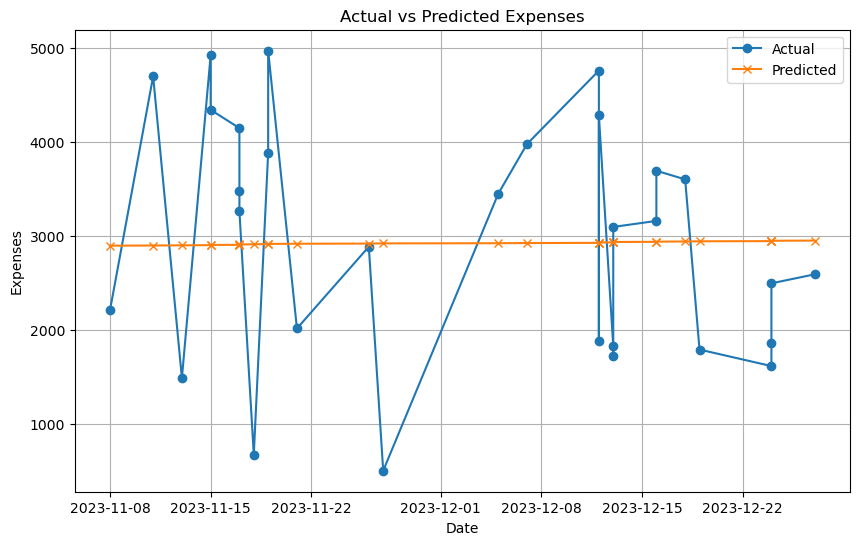

Forecasted Future Expenses:
[2953.75059495 2955.6143216  2957.47804824 2959.34177489 2961.20550154
 2963.06922819 2964.93295483 2966.79668148 2968.66040813 2970.52413478]


In [2]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Step 2: Load Dataset
data = pd.read_csv('expenses.csv')

# Step 3: Explore Dataset
print(data.head())
print(data.info())

# Step 4: Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['date'])

# Step 5: Set Date as Index
data.set_index('Date', inplace=True)

# Step 6: Feature Engineering
# Create a numerical feature for time
data['Time'] = range(len(data))

# Step 7: Prepare features and target
X = data[['Time']]
y = data['amount']

# Step 8: Train-Test Split (80% train, 20% test)
split = int(0.8 * len(data))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Step 9: Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 10: Predict
y_pred = model.predict(X_test)

# Step 11: Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Step 12: Plot Actual vs Predicted
plt.figure(figsize=(10,6))
plt.plot(data.index[split:], y_test, label='Actual', marker='o')
plt.plot(data.index[split:], y_pred, label='Predicted', marker='x')
plt.title('Actual vs Predicted Expenses')
plt.xlabel('Date')
plt.ylabel('Expenses')
plt.legend()
plt.grid(True)
plt.show()

# Step 13: Forecast Future
# Forecast next 10 time points
future_time = pd.DataFrame({'Time': range(len(data), len(data)+10)})
future_pred = model.predict(future_time)

# Display forecasted values
print("Forecasted Future Expenses:")
print(future_pred)


#  Experiment-6

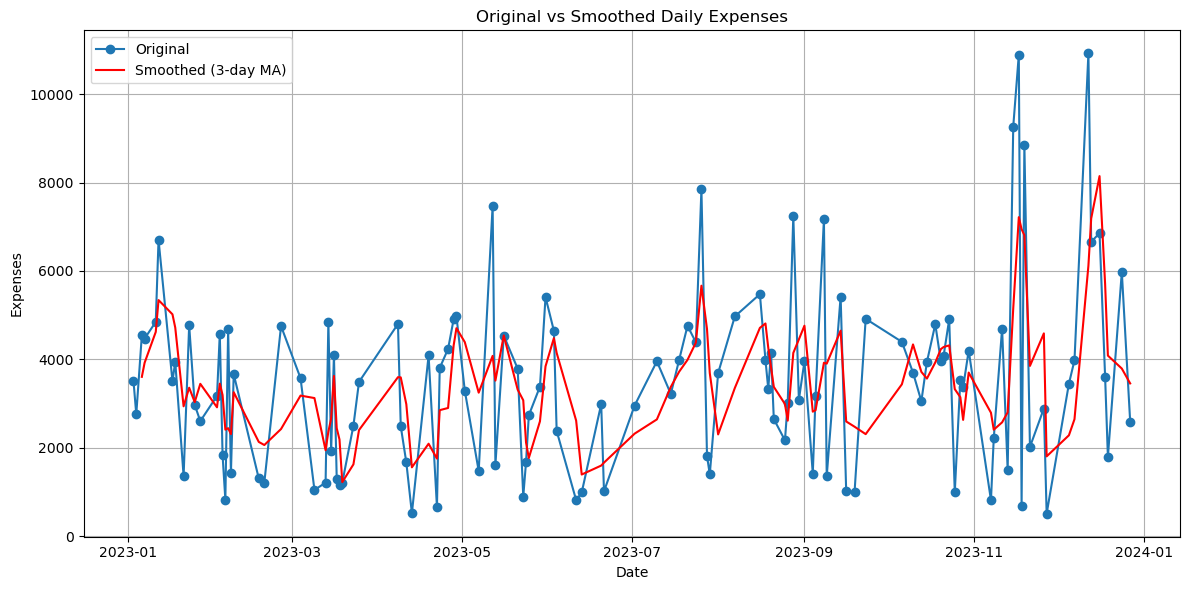

[3776.222222222222, 3776.222222222222, 3776.222222222222]

In [4]:
data['date'] = pd.to_datetime(data['date'])

# Step 2: Aggregate total expenses per day
daily_expenses = data.groupby('date')['amount'].sum().reset_index()
daily_expenses.sort_values('date', inplace=True)

# Step 3: Apply Moving Average Smoothing (3-day window)
daily_expenses['Smoothed'] = daily_expenses['amount'].rolling(window=3).mean()

# Step 4: Plot original vs smoothed data
plt.figure(figsize=(12, 6))
plt.plot(daily_expenses['date'], daily_expenses['amount'], label='Original', marker='o')
plt.plot(daily_expenses['date'], daily_expenses['Smoothed'], label='Smoothed (3-day MA)', linestyle='-', color='red')
plt.title('Original vs Smoothed Daily Expenses')
plt.xlabel('Date')
plt.ylabel('Expenses')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 5: Forecast next 3 days using average of last 3 smoothed values
last_3_smoothed = daily_expenses['Smoothed'].dropna().iloc[-3:]
forecast_next_3 = [last_3_smoothed.mean()] * 3

forecast_next_3

# Experiment-7


In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

C:\Users\22150\AppData\Local\Temp\ipykernel_27576\2063240291.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  daily_expenses['amount'] = daily_expenses['amount'].fillna(method='ffill')  # Fill missing values


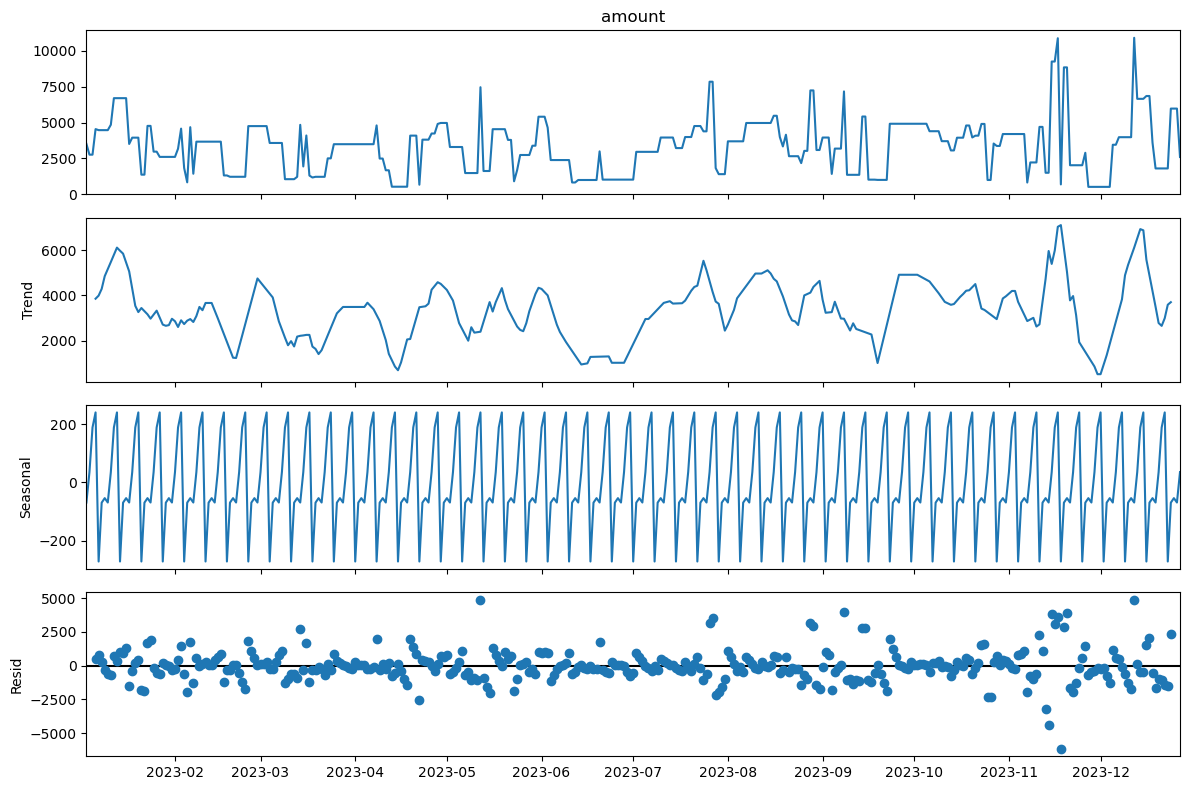

In [7]:
# Step 2: Group by date and sum daily expenses
daily_expenses = data.groupby('date')['amount'].sum().reset_index()
daily_expenses.sort_values('date', inplace=True)
daily_expenses.set_index('date', inplace=True)

# Step 3: Set frequency and fill missing dates
daily_expenses = daily_expenses.asfreq('D')  # Daily frequency
daily_expenses['amount'] = daily_expenses['amount'].fillna(method='ffill')  # Fill missing values

# Step 4: Decompose the time series
decomposition = seasonal_decompose(daily_expenses['amount'], model='additive')

# Step 5: Plot the components
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.tight_layout()
plt.show()

# Experiment-8 

C:\Users\22150\AppData\Local\Temp\ipykernel_27576\3101902522.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  daily_expenses['amount'].fillna(method='ffill', inplace=True)
C:\Users\22150\AppData\Local\Temp\ipykernel_27576\3101902522.py:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  daily_expenses['amount'].fillna(method='ffill', inplace=True)


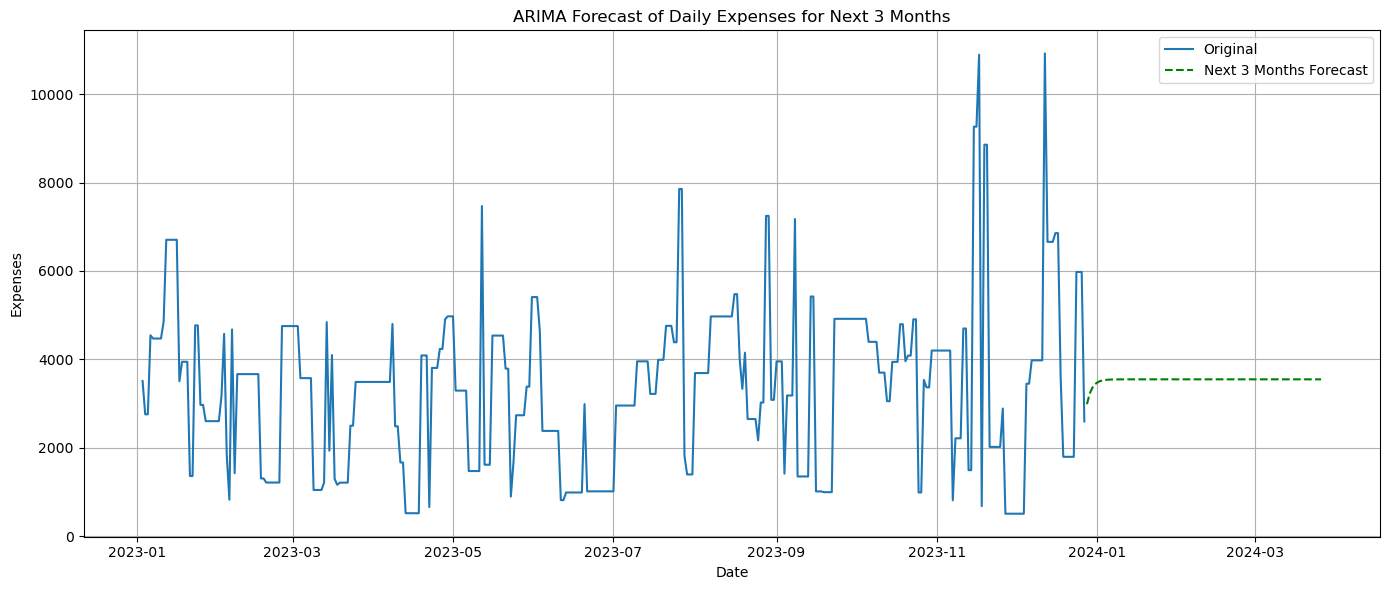

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()


daily_expenses = data.groupby('date')['amount'].sum().reset_index()
daily_expenses.set_index('date', inplace=True)
daily_expenses = daily_expenses.asfreq('D')
daily_expenses['amount'].fillna(method='ffill', inplace=True)

# Step 2: Fit ARIMA model
ts_data = daily_expenses['amount']
model = ARIMA(ts_data, order=(1, 1, 1))  # You can tune (p,d,q)
model_fit = model.fit()

# Step 3: Forecast next 90 days (≈ 3 months)
forecast_steps = 90
forecast = model_fit.forecast(steps=forecast_steps)

# Step 4: Create date range for forecast
last_date = ts_data.index[-1]
forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_steps, freq='D')
forecast_df = pd.DataFrame({'date': forecast_dates, 'forecast': forecast.values})
forecast_df.set_index('date', inplace=True)

# Step 5: Plot
plt.figure(figsize=(14, 6))
plt.plot(ts_data, label='Original')
plt.plot(forecast_df.index, forecast_df['forecast'], label='Next 3 Months Forecast', color='green', linestyle='--')
plt.title('ARIMA Forecast of Daily Expenses for Next 3 Months')
plt.xlabel('Date')
plt.ylabel('Expenses')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



#Experiment-9 

# 

Columns in dataset: Index(['date', 'amount', 'category'], dtype='object')


Epoch 1/20

7/7 [==============================] - 3s 100ms/step - loss: 0.2676 - val_loss: 0.1642
Epoch 2/20
7/7 [==============================] - 0s 8ms/step - loss: 0.1149 - val_loss: 0.0917
Epoch 3/20
7/7 [==============================] - 0s 7ms/step - loss: 0.1096 - val_loss: 0.0929
Epoch 4/20
7/7 [==============================] - 0s 8ms/step - loss: 0.1033 - val_loss: 0.0874
Epoch 5/20
7/7 [==============================] - 0s 7ms/step - loss: 0.1001 - val_loss: 0.0907
Epoch 6/20
7/7 [==============================] - 0s 9ms/step - loss: 0.0994 - val_loss: 0.0878
Epoch 7/20
7/7 [==============================] - 0s 9ms/step - loss: 0.0975 - val_loss: 0.0857
Epoch 8/20
7/7 [==============================] - 0s 9ms/step - loss: 0.0980 - val_loss: 0.0852
Epoch 9/20
7/7 [==============================] - 0s 9ms/step - loss: 0.0975 - val_loss: 0.0852
Epoch 10/20
7/7 [==============================] - 0s 8ms

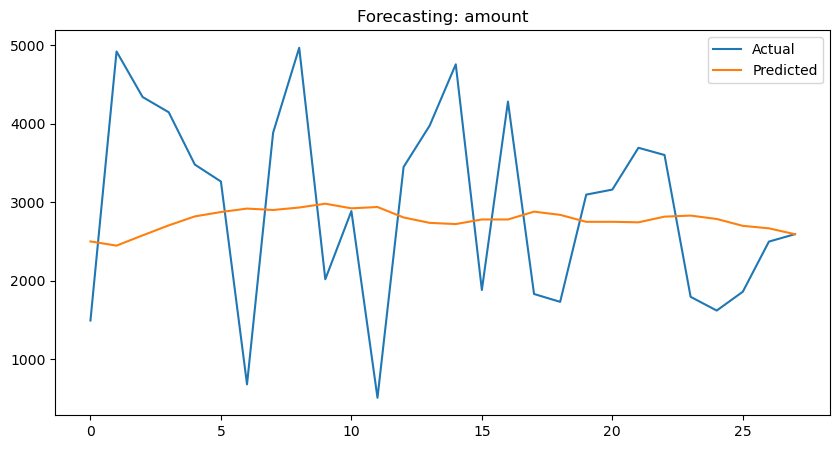

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# 1. Load the data
df = pd.read_csv('expenses.csv')

# 2. Check columns
print("Columns in dataset:", df.columns)

# 3. Convert date column if it exists
if 'date' in df.columns:
    df['Date'] = pd.to_datetime(df['date'])
    df.set_index('Date', inplace=True)

# 4. Select a numeric column for forecasting
# Change 'Total_Expense' below to the actual column name you want to forecast
target_column = df.select_dtypes(include='number').columns[0]
data = df[[target_column]].dropna().values

# 5. Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# 6. Create sequences
def create_sequences(data, seq_len=10):
    X, y = [], []
    for i in range(seq_len, len(data)):
        X.append(data[i-seq_len:i])
        y.append(data[i])
    return np.array(X), np.array(y)

SEQ_LEN = 10
X, y = create_sequences(scaled_data, SEQ_LEN)

# 7. Train/test split
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# 8. Build the model
model = Sequential([
    LSTM(64, input_shape=(SEQ_LEN, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# 9. Train the model
model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

# 10. Predict and inverse transform
predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted)
y_test_orig = scaler.inverse_transform(y_test)

# 11. Plot
plt.figure(figsize=(10, 5))
plt.plot(y_test_orig, label='Actual')
plt.plot(predicted, label='Predicted')
plt.legend()
plt.title(f'Forecasting: {target_column}')
plt.show()


# eXP-10

Using numeric columns: ['Subcategory', 'INR', 'Note.1', 'Amount', 'Account.1']

ADF Test Results:

ADF Test Results:
Skipping ADF Test for Subcategory: Series is empty.
Skipping ADF Test for INR: Series is empty.
Skipping ADF Test for Note.1: Series is empty.
Skipping ADF Test for Amount: Series is empty.
Skipping ADF Test for Account.1: Series is empty.


C:\Users\22150\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ValueError: maxlags is too large for the number of observations and the number of equations. The largest model cannot be estimated.